In [1]:
import pandas as pd
import numpy as np

# 그래프 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

print(df_ins.shape)
df_ins.head(3)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# 수치형 변수의 기초통계량 파악
df_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. 범주형 변수의 집계와 시각화

In [5]:
df_ins.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [6]:
# 흡연여부(somker) 변수의 수준(level) 확인
df_ins['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
# 흡연자, 비흡연자가 각각 몇명씩 있는지?
df_ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

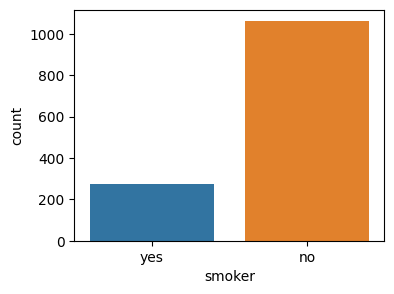

In [77]:
# 막대그래프로 흡연자, 비흡연자 수 확인
plt.figure(figsize=(4, 3))          # (맨윗줄) 이미지 사이즈 조절
sns.countplot(data=df_ins, x='smoker');

In [9]:
# [실습] df_sp 데이터에서 "parental level of education" 변수에 대해서
# 1. 수준(level)에 어떤 것들이 있나? 
# 2. 수준 별 관측치 수
# 3. 관측치 수 막대그래프
# plt.xticks(rotation=45)      # x축 눈금 레이블 회전

In [10]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head(3)

,sex,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


# 2. 수치형 변수의 집계와 분포 그래프

In [14]:
# 집계값 : 카운트, 평균, 4분위수 등

In [15]:
df_ins['charges'].mean()  # 평균

13270.422265141257

In [16]:
df_ins['charges'].sum()   # 합계

17755824.990759

In [17]:
df_ins['charges'].std()   # 표준편차

12110.011236693994

In [18]:
round(df_ins['charges'].std(), 2)   # 반올림 함수

12110.01

### 2-1. 히스토그램(histogram) : 수치형 변수의 분포를 파악

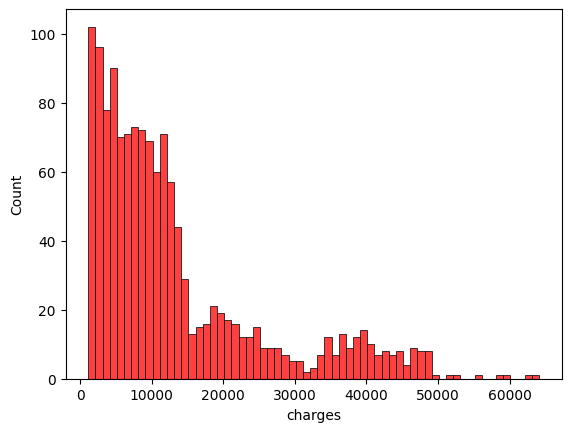

In [19]:
sns.histplot(data=df_ins, x='charges', binwidth=1000, color='red');

#### [실습] 수치형 변수 파악

In [20]:
# 1. df_sp 데이터에서 'math score' 의 평균 계산하기
# 2. 'math score' 의 히스토그램 그리기, binwidth, color 변경 해보기

In [21]:
df_sp.head(2)

,sex,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 2-2. 분위수와 상자그림(boxplot), 이상치 데이터

In [24]:
# 최댓값(100%)
# Q3, 75%에 위치한 값
# Q2(중앙값, median), 50%에 위치한 값
# Q1, 25%에 위치한 값
# 최솟값(0%)

In [25]:
# 보험료(charges)의 최댓값, 최솟값, 중앙값
df_ins['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [26]:
# 분위수 구하는 함수 : quantile()
Q1 = df_ins['charges'].quantile(0.25)  # Q1

In [27]:
Q3 = df_ins['charges'].quantile(0.75)  # Q3

In [28]:
df_ins['charges'].quantile(1.0)  # 최댓값

63770.42801

In [29]:
IQR = Q3 - Q1

In [30]:
# 상위 이상치 경계
outlier_high = Q3 + 1.5*IQR
outlier_high

34489.350562499996

In [31]:
# 하위 이상치 경계
Q1 - 1.5*IQR

-13109.1508975

#### [실습] df_ins 데이터에서 상위 이상치 경계보다 큰 charges(조건) 데이터 추출하기

In [32]:
df_ins['charges'] > outlier_high  # 조건

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool

In [33]:
df_ins[ df_ins['charges'] > outlier_high ]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


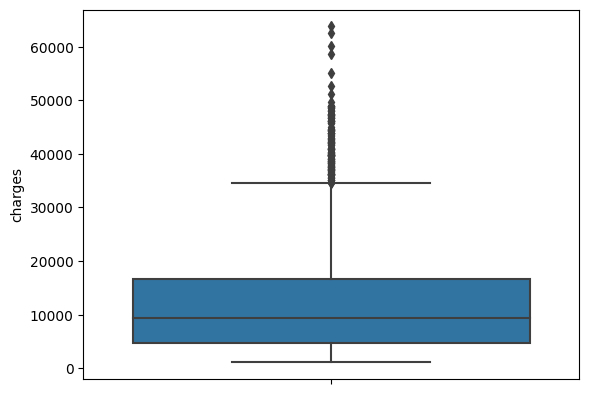

In [34]:
# df_ins 데이터의 charges 변수 상자그림 그리기
sns.boxplot(data=df_ins, y='charges');

#### [실습] df_sp 데이터에서 'reading score' 변수 파악

In [35]:
# 1. 사분위수 - Q1(25%), Q2(50%), Q3(75%) 구하기
# 2. boxplot 그리기

# 3. 두 범주형 변수의 관계 탐색

In [43]:
# 교차표(crosstab)
# 열지도(heatmap)

In [44]:
# df_ins의 성별(남,녀) 흡연여부(yes, no) 차이가 있을까?
# 교차표
tab1 = pd.crosstab(df_ins['sex'], df_ins['smoker'])
tab1

smoker,no,yes
sex,,
female,547,115
male,517,159


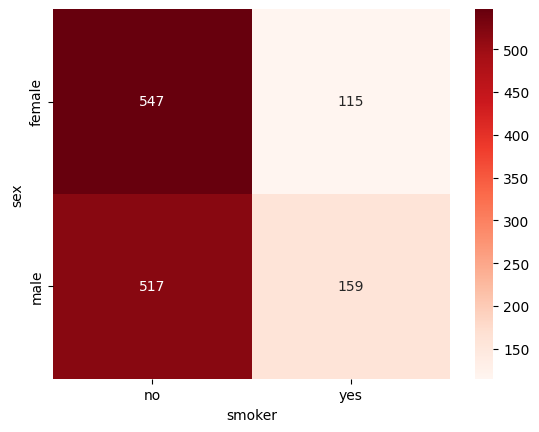

In [45]:
# 열지도(heatmap)
sns.heatmap(data=tab1, cmap='Reds', annot=True, fmt='d');
# cmap : 컬러 맵 : 'YlGnBu', 'Reds', ...
# annot : 수치 표현
# fmt : 수치의 포멧 지정('d': 정수형, '.2f': 실수형)

In [46]:
# 행백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index')

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


In [47]:
# 열백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns')

smoker,no,yes
sex,,
female,0.514098,0.419708
male,0.485902,0.580292


# 4. 두 수치형 변수의 관계 탐색

In [48]:
# 산점도(scatterplot) 
# 상관관계 분석 - 상관계수(correlation coefficient)

In [49]:
# 아빠키와 아들키 데이터 불러오기
df_heights = pd.read_csv('data/heights.csv')

print(df_heights.shape)
df_heights.head(3)

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747


In [50]:
# Q. 아빠키와 아들키는 상관관계가 있을까?

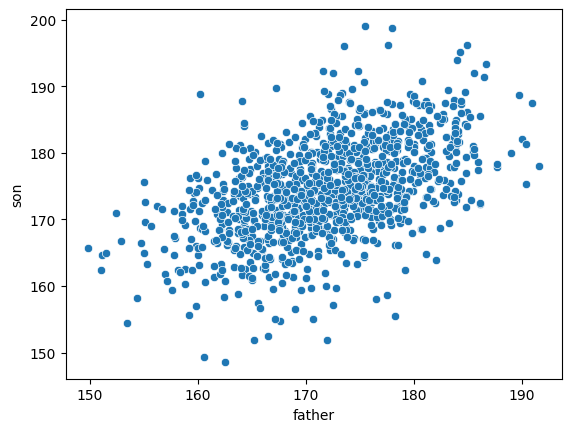

In [51]:
# 산점도
sns.scatterplot(data=df_heights, 
                x='father', y='son');

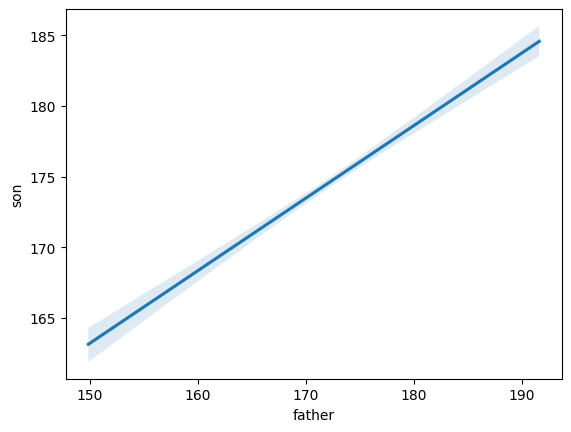

In [52]:
# 간단하게 추세선 그리기
sns.regplot(data=df_heights, scatter=False,
            x='father', y='son');

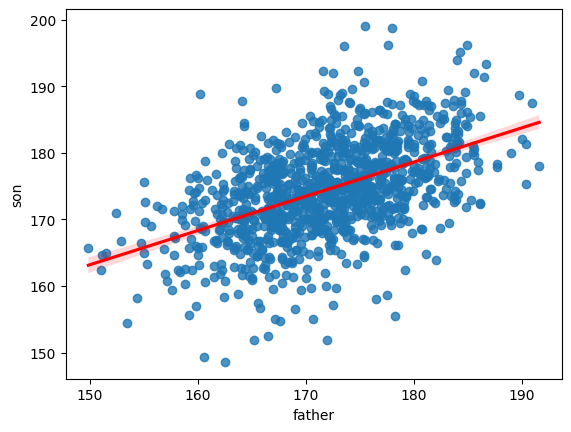

In [53]:
# 추세선 색상 변경하기
sns.regplot(data=df_heights, scatter=True,
            x='father', y='son', 
            line_kws={'color':'red'});

### 상관계수

In [54]:
# Q. 아빠키와 아들키의 상관계수는 얼마일까?
# 상관계수 : 두 수치형 변수 간의 상관(비례 관계)이 있는가?
# -1 ~ 1 

In [55]:
# corr() : 한번에 표로 변수 간 상관계수를 구해주는 함수
df_heights.corr()

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


In [56]:
# 데이터프레임에서 특정 위치의 값 추출 : iloc[]
df_heights.corr().iloc[0, 1]

0.5013383111723431

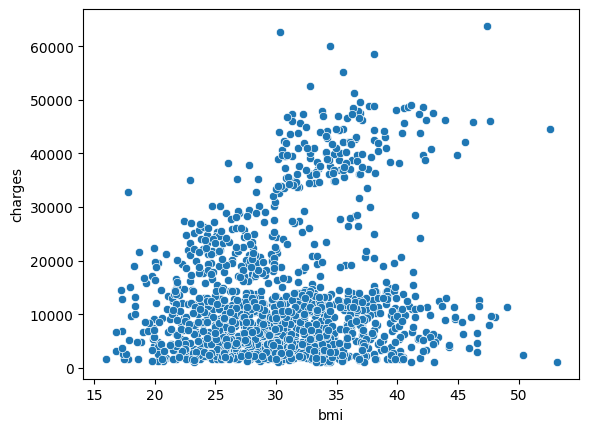

In [57]:
# Q. df_ins 데이터의 'bmi'와 'charges' 간 상관관계가 있을까?
sns.scatterplot(data=df_ins, x='bmi', y='charges');

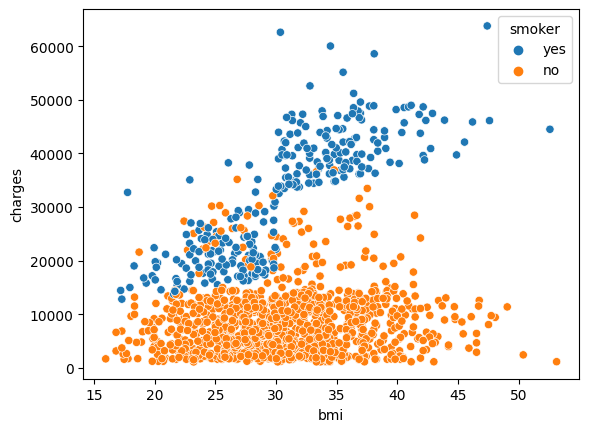

In [58]:
# hue 옵션을 사용해서 그룹 간 scatterplot 비교
sns.scatterplot(data=df_ins, x='bmi', y='charges', hue='smoker');

In [59]:
# 흡연자는 bmi와 charges 간 양의 상관관계가 있다.
# 비흡연자는 bmi와 charges 간 상관관계가 없다.

# 5. 범주형 변수와 수치형 변수의 관계

In [61]:
df_ins.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


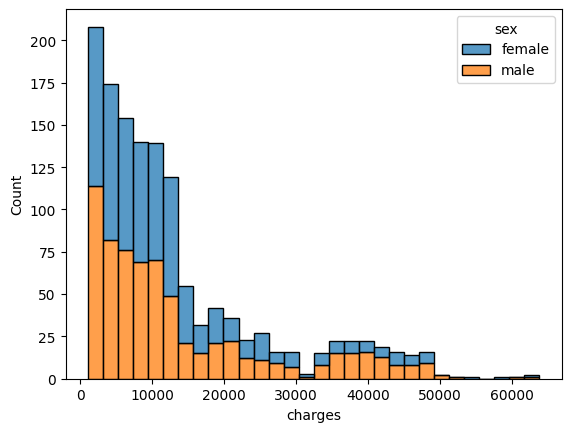

In [62]:
# 성별 보험료의 분포는 어떻게 다를까?
sns.histplot(data=df_ins, 
             x='charges', 
             hue='sex', 
             multiple='stack');

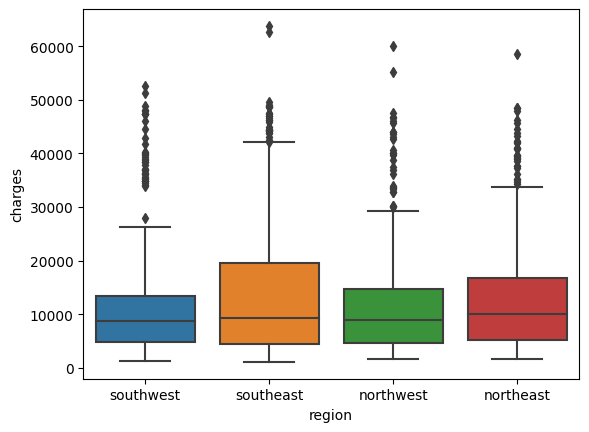

In [80]:
# 상자그림으로 지역별 보험료 분포의 차이를 확인
sns.boxplot(data=df_ins, 
            y='charges', 
            x='region');

In [65]:
df_sp.head(1)

,sex,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


#### [실습] 범주형 변수와 수치형 변수 관계

In [66]:
# 1. df_sp 에서 'sex' 별 'math score' 평균 계산하기 (groupby)
# 2. 'sex' 별 'math score' 히스토그램, 상자그림

In [67]:
# groupby 사용 방법 : df.groupby('범주형변수')['수치형변수'].집계함수()
# 집계함수 : 평균, 합계, 카운트, 최대값, 최소값 등